In [6]:
from src.config import filepaths
from src.utils import construct_sparse_adj_mat, load_json
from src.similarity import rcmcs_similarity
import numpy as np
import matplotlib.pyplot as plt
import rdkit
from rdkit import Chem
from rdkit.Chem import AllChem, Draw
from rdkit.Chem.Draw import IPythonConsole
import pandas as pd

rng = np.random.default_rng(seed=1234)

In [7]:
smfp = filepaths['artifacts_sim_mats']

In [8]:
dataset = 'sprhea'
toc = 'v3_folded_pt_ns'

adj, idx_sample, idx_feature = construct_sparse_adj_mat(dataset, toc)
krs = load_json(filepaths['data_sprhea'] / f"{toc}.json")
rules = pd.read_csv(filepaths['data'] / "minimal1224_all_uniprot.tsv", sep='\t', )
rules.set_index('Name', inplace=True)

rxn_sim_metrics = [
    'bag_of_molecules_reactions',
    'rc_agg_r2_reactions',
    'rc_agg_r3_reactions',
    'rc_agg_r4_reactions',
    "rcmcs"
]

rxn_sim_mats = {name: np.load(smfp / f"{dataset}_{toc}_{name}.npy")
                for name in rxn_sim_metrics}

Constructing sprhea:v3_folded_pt_ns sparse adjacency matrix


In [23]:
filter_zero_rcmcs = False
n_points = 10000
n = rxn_sim_mats['rcmcs'].shape[0]
if filter_zero_rcmcs:
    idxs = np.vstack(np.nonzero(rxn_sim_mats['rcmcs'])).T
    idxs = idxs[idxs[:, 0] != idxs[:, 1]]
else:
    idxs = np.vstack(np.triu_indices(n, k=1)).T
sel = rng.choice(idxs.shape[0], size=n_points, replace=False)
idxs = idxs[sel]
idxs
i, j = idxs[:, 0], idxs[:, 1]

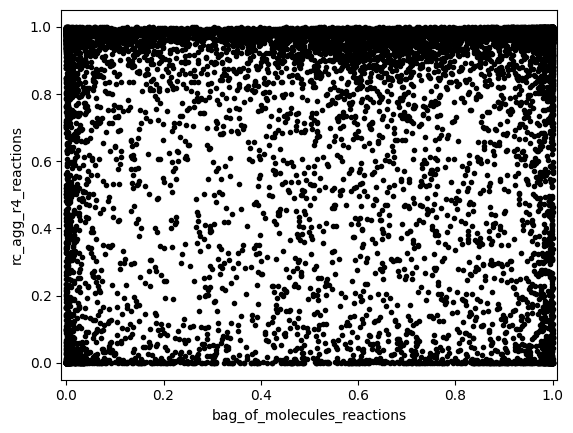

In [24]:
sim_mats = ['bag_of_molecules_reactions', 'rc_agg_r4_reactions']
mean_sub_scl = False
data = []
for sm in sim_mats:
    data.append(rxn_sim_mats[sm][i, j])

x, y = data
if mean_sub_scl:
    x -= x.mean()
    x /= x.std()
    y -= y.mean()
    y /= y.std()
fig, ax = plt.subplots()
ax.plot(x, y, '.', color='black')
ax.set_xlabel(sim_mats[0])
ax.set_ylabel(sim_mats[1])
ax.set_xlim(-0.01, 1.01)
ax.set_xlim(-0.01, 1.01)
plt.show()

In [11]:
set(np.where(x > 0.9)[0]) & set(np.where(y < -1.4)[0])

set()

In [12]:
idx = 3871
rid1 = idx_feature[i[idx]]
rid2 = idx_feature[j[idx]]
rxn1 = krs[idx_feature[i[idx]]]
rxn2 = krs[idx_feature[j[idx]]]
print(f"{sim_mats[0]} {x[idx]}", f"{sim_mats[1]} {y[idx]}")
reactions = {rid1: rxn1, rid2: rxn2}
idx2id = {0: rid1, 1: rid2}
rcmcs_similarity(
    rxns=reactions,
    rules=rules,
    matrix_idx_to_rxn_id=idx2id,
)

bag_of_molecules_reactions 0.5541695356369019 rc_agg_r4_reactions 0.9892459511756897
Preparing reaction pairs

Rxn # 0 : 18501
Processing pairs



0it [00:00, ?it/s]


ValueError: not enough values to unpack (expected 2, got 0)

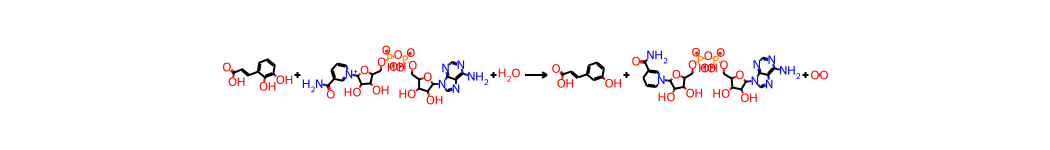

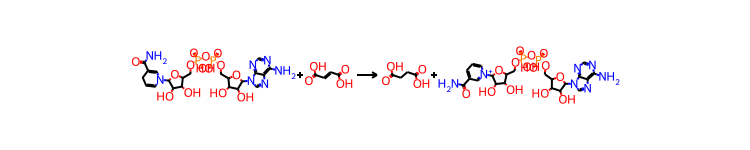

In [48]:
display(AllChem.ReactionFromSmarts(rxn1['smarts'], useSmiles=True))
display(AllChem.ReactionFromSmarts(rxn2['smarts'], useSmiles=True))

In [38]:
rxn1

{'smarts': 'CC(C)(COP(=O)(O)OP(=O)(O)OCC1OC(n2cnc3c(N)ncnc32)C(O)C1OP(=O)(O)O)C(O)C(=O)NCCC(=O)NCCS.*C(=O)O.Nc1ncnc2c1ncn2C1OC(COP(=O)(O)OP(=O)(O)OP(=O)(O)O)C(O)C1O>>*C(=O)SCCNC(=O)CCNC(=O)C(O)C(C)(C)COP(=O)(O)OP(=O)(O)OCC1OC(n2cnc3c(N)ncnc32)C(O)C1OP(=O)(O)O.O=P(O)(O)OP(=O)(O)O.Nc1ncnc2c1ncn2C1OC(COP(=O)(O)O)C(O)C1O',
 'min_rules': ['rule0039', 'rule0038'],
 'rcs': [[[47], [1, 3], [18, 15]], [[1, 3], [2], [17, 15]]],
 'enzymes': [{'uniprot_id': 'Q08AH3',
   'sequence': 'MHWLRKVQGLCTLWGTQMSSRTLYINSRQLVSLQWGHQEVPAKFNFASDVLDHWADMEKAGKRLPSPALWWVNGKGKELMWNFRELSENSQQAANVLSGACGLQRGDRVAVVLPRVPEWWLVILGCIRAGLIFMPGTIQMKSTDILYRLQMSKAKAIVAGDEVIQEVDTVASECPSLRIKLLVSEKSCDGWLNFKKLLNEASTTHHCVETGSQEASAIYFTSGTSGLPKMAEHSYSSLGLKAKMDAGWTGLQASDIMWTISDTGWILNILCSLMEPWALGACTFVHLLPKFDPLVILKTLSSYPIKSMMGAPIVYRMLLQQDLSSYKFPHLQNCVTVGESLLPETLENWRAQTGLDIRESYGQTETGLTCMVSKTMKIKPGYMGTAASCYDVQIIDDKGNVLPPGTEGDIGIRVKPIRPIGIFSGYVDNPDKTAANIRGDFWLLGDRGIKDEDGYFQFMGRANDIINSSGYRIGPSEVENALMEHPAVVETAVISSPDPVRGEVVKAFVVLASQFLSHDPEQLT

In [35]:
rxn2

{'smarts': '*C=CC(=O)SCCNC(=O)CCNC(=O)C(O)C(C)(C)COP(=O)(O)OP(=O)(O)OCC1OC(n2cnc3c(N)ncnc32)C(O)C1OP(=O)(O)O.OO>>*CCC(=O)SCCNC(=O)CCNC(=O)C(O)C(C)(C)COP(=O)(O)OP(=O)(O)OCC1OC(n2cnc3c(N)ncnc32)C(O)C1OP(=O)(O)O.O=O',
 'min_rules': ['rule0114', 'rule0109'],
 'rcs': [[[1, 2], [0, 1]], [[1, 2], [0, 1]]],
 'enzymes': [{'uniprot_id': 'Q8HYL8',
   'sequence': 'MNPDLRRERDAASFDAEKLTYILDGGSERTRRRREIENLILNDPDFKHEDLNFLTRSERYEIAVRKSATMVKKMRDFGIADPEEIMWFKKPQLINFVEPVGLTYSMFIPTLLDQGTTAQQQKWLPPTQGLQIIGTYAQTEMGHGTHLRGLETTATYDPKTQEFILNSPTVTSIKWWPGGLGKTSNHAIVLAQLYTKGECYGLHAFIVPIREMGTHKPFPGIIVGDIGPKFGYDEMDNGYLKMDNYRIPRENMLMKYAQVKPDGTYVKPLSNKLTYGTMVFVRSFLVGEAARSLSKACTIAIRYSLIRHQSEIRPGDPEPQILDFQTQQYKLFPLLATAYAFQFVGAYMKETYHRINVDINQGNLNELPELHALTAGLKAFTSWTTNSGIEACRMACGGHGYSHCSGLPNIYVTFTPTCTFEGENTVMMLQTARFLMKSYDQVHSGKLVGGMVSYLNDLPSQRIQPQQVAAWPAMVDINNPDSLTEAYKHRAARLVEAAARNLQAEMKHRKSKEIAWNFTSVDLVRASEAHCHYVVVKLFSGNLSKIDDKPIQAVLTNLCLLYALYGISQNSGDFLQGGILTESQLTQVNQRVKELLTLIRPESAALVDAFDFQDVSLGSVLGRYDGNIYENMFEWAKKSPLNKSE